# Exoplanets
*by Daniel Harrington*

An exploration of exoplanet data provided by NASA and the Planetary Habitability Library (PHL) at the University of Puerto Rico.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Earth Similarity Index

The Earth Similarity Index (ESI) is a metric proposed by Schulze-Makuch, *et. al* in 2011 that describes the similarity of exoplanets to Earth with a variety of factors. Used here is the ESI as a function of solar flux ($S_E$) and radius ($R_E$), both for the amount of exoplanets with these two categories logged and its use by the PHL.

The ESI is calculated as follows, with $S$ and $R$ being in units of Earth flux and Earth radius, respectively:

$$
\mathrm{ESI}(S, R)=
1-\sqrt{\frac{1}{2}\left[\left(\frac{S-S_{E}}{S+S_{E}}\right)^2+\left(\frac{R-R_{E}}{R+R_{E}}\right)^2\right]}
$$

In [39]:
s_earth = 1361.0 # W/m^2
r_earth = 6378.137 # km

In [40]:
def ESI(s, r):
    # Returns ESI for a given s, r
    # Params: s: solar flux (earth flux), r: planet radius (earth radius)
    return 1 - np.sqrt(0.5 * ( ((s-s_earth)/(s+s_earth))**2 + ((r-r_earth)/(r_earth+r))**2 ))

Now define the phase space of the ESI for a broad range of $S_E$, $R_E$:

In [41]:
s = np.linspace(10e-4, 10e+2, int(10e+3)) 
r = np.linspace(10e-3, 10e+1, int(10e+3))
ss, rr = np.meshgrid(s, r)
esi = ESI(ss * s_earth, rr * r_earth)

Import NASA Exoplanet Data:

In [42]:
nasa_csv = pd.read_csv('exoplanet_q1.csv').drop_duplicates('pl_name')
nasa_disc_year = np.array(nasa_csv['disc_year'].dropna())
nasa_data = nasa_csv[['pl_rade', 'pl_insol', 'disc_year']].dropna().sort_values('disc_year', ascending=False)
svals = np.array(nasa_data['pl_insol'])
rvals = np.array(nasa_data['pl_rade'])

The generic exoplanet data will be compared with the top exoplanet candidates for habitability as listed in the Habitable Planets Catalog (HPC) by the PHL. HEC rankings are not determined *by* the ESI, but the ESI uses correlated metrics and so the two are related.

Import HEC Data:

In [43]:
hec_csv = pd.read_csv('hec.csv')
hec_svals = np.array(hec_csv['pl_insol'])
hec_rvals = np.array(hec_csv['pl_rade'])
hec_temps = np.array(hec_csv['pl_eqt'])
hec_dist = np.array(hec_csv['sy_dist'])

In [44]:
lvls = np.linspace(0, 1, 9) # Contour levels

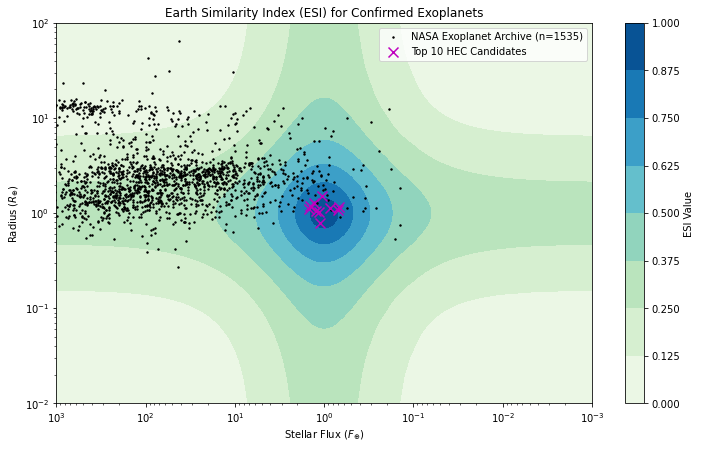

In [45]:
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(10e-4, 10e2)
ax1.set_ylim(10e-3, 10e1)
ax1.set_title('Earth Similarity Index (ESI) for Confirmed Exoplanets')
ax1.set_xlabel(r'Stellar Flux $(F_{\oplus})$')
ax1.set_ylabel(r'Radius $(R_{\oplus})$')
ax1.invert_xaxis()
cont = ax1.contourf(ss, rr, esi, cmap='GnBu', levels=lvls)
ax1.scatter(svals, rvals, s=2, c='k', label='NASA Exoplanet Archive (n=1535)')
ax1.scatter(hec_svals, hec_rvals, s=100, marker='x', c='m', label='Top 10 HEC Candidates')
ax1.legend()
fig1.colorbar(cont, label='ESI Value')
plt.show()
# fig1.savefig('img/esi_phase.jpg')

### Solar Flux and Surface Temperature

Surface temperature is influenced by many factors, including atmosphere and stellar distance. Both to see the relationship and to practice my matplotlib skills, I graphed solar flux against temperature for a small sample size to see the correlation. Only a few ($n=10$) HEC planets were used for the convenient availability of the data, so any correlation is not statistically significant.

Temperature data is estimated using luminosity values of the host star or planet directly as if the planet were a black body [source].

In [46]:
# Polynomial fit line (p=1, linear)
model_coeff = np.polyfit(hec_svals, hec_temps, 1)
model_func = np.poly1d(model_coeff)
x = np.arange(0.7, 1.5, 0.01)
f_x = model_func(x)

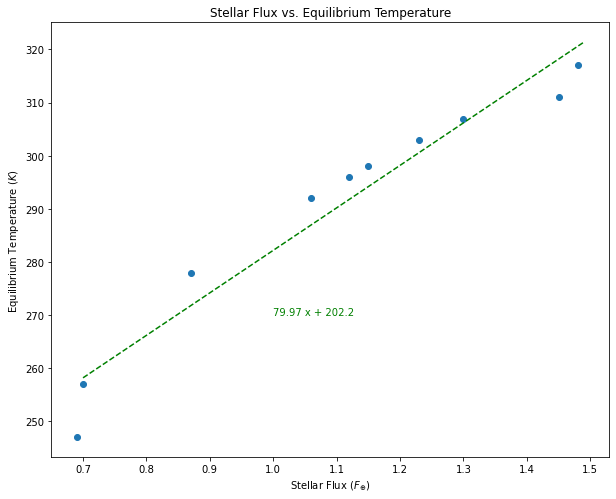

In [47]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(hec_svals, hec_temps)
ax2.plot(x, f_x, '--', c='g')
ax2.set_xlabel(r'Stellar Flux ($F_{\oplus}$)')
ax2.set_ylabel(r'Equilibrium Temperature ($K$)')
ax2.set_title('Stellar Flux vs. Equilibrium Temperature')
ax2.text(1.0, 270, s=str(model_func), c='g')
plt.show()
# fig2.savefig('img/flux_v_temp.jpg')


### Annual Discoveries

Here is a comparison of the number of exoplanets discovered each year. There is a slow trend upwards, with notable outliers in 2014 and 2016, when the Kepler misssion made major announcements of new exoplanet discoveries.

In [48]:
year_bins = np.bincount(nasa_disc_year)[2000:2023] # from years 2000 to 2022
years = np.arange(2000, 2022+1, 1)

In [49]:
from matplotlib.ticker import AutoMinorLocator

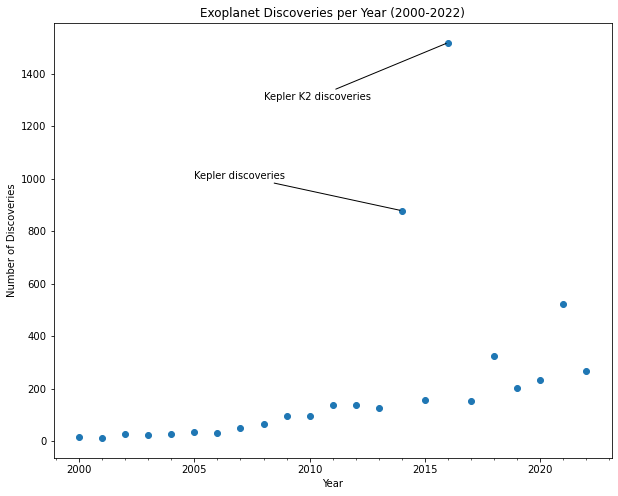

In [50]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(years, year_bins)
ax3.set_title('Exoplanet Discoveries per Year (2000-2022)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Discoveries')
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.annotate('Kepler K2 discoveries', xy=(2016, 1518), xytext=(2008, 1300),
    arrowprops=dict(arrowstyle='-')
)
ax3.annotate('Kepler discoveries', xy=(2014, 878), xytext=(2005, 1000),
    arrowprops=dict(arrowstyle='-')
)
plt.show()
# fig3.savefig('img/discoveries.jpg')

### ESI Trends

Since the ESI value seemed to be correlated with habitability (defined by the HEC), I wanted to see what else it was correlated with. It is interesting to see that the similarity metric only computed from radius and solar flux demonstrates similarity with Earth in other areas, such as stellar radius and mass.

The data is slightly skewed in that from the 5000+ exoplanets confirmed, only 1324 have data for each parameter inspected. Due to this skewing, only ESI values < 0.3 are significantly represented. This may be because the larger planets, which have a higher ESI, are easier to detect and collect a range of data from, though I need to do more research to confirm this.

In [51]:
nasa_more_data = nasa_csv[['pl_rade', 'pl_insol', 'pl_orbper', 'st_mass', 'st_rad']].dropna()
nasa_more_data['pl_esi'] = ESI(nasa_more_data['pl_insol'], nasa_more_data['pl_rade'])
nasa_more_data['esi_bin'] = pd.cut(nasa_more_data['pl_esi'], bins=np.arange(0, 1.1, 0.1))

In [52]:
mask = np.array([False, True])

orb_grouped = nasa_more_data['pl_orbper'].groupby(nasa_more_data['esi_bin'])
orb_g_array = np.array(orb_grouped, dtype=object)[:3]
orb_masked = orb_g_array[:, mask]
orb_data = np.array([i[0].array for i in orb_masked], dtype=object)

rad_grouped = nasa_more_data['pl_rade'].groupby(nasa_more_data['esi_bin'])
rad_g_array = np.array(rad_grouped, dtype=object)[:3]
rad_masked = rad_g_array[:, mask]
rad_data = np.array([i[0].array for i in rad_masked], dtype=object)

st_m_grouped = nasa_more_data['st_mass'].groupby(nasa_more_data['esi_bin'])
st_m_g_array = np.array(st_m_grouped, dtype=object)[:3]
st_m_masked = st_m_g_array[:, mask]
st_m_data = np.array([i[0].array for i in st_m_masked], dtype=object)

st_r_grouped = nasa_more_data['st_mass'].groupby(nasa_more_data['esi_bin'])
st_r_g_array = np.array(st_r_grouped, dtype=object)[:3]
st_r_masked = st_r_g_array[:, mask]
st_r_data = np.array([i[0].array for i in st_r_masked], dtype=object)

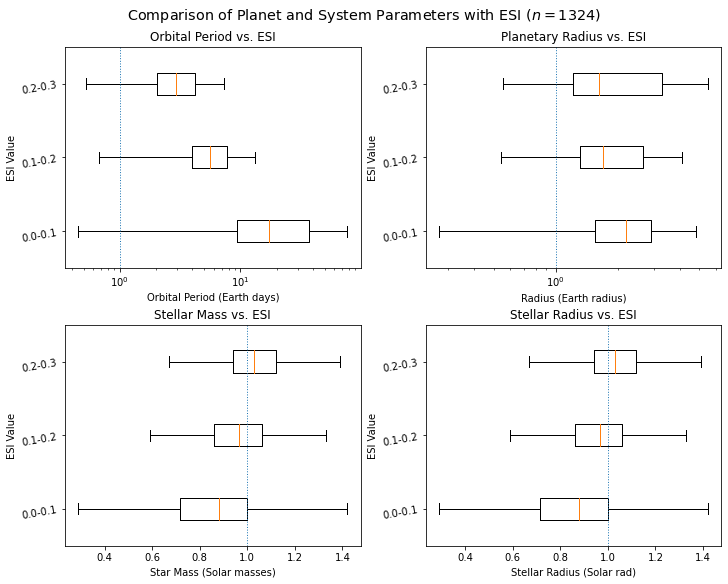

In [53]:
fig4, axd = plt.subplot_mosaic([['upper left', 'upper right'], ['lower left', 'lower right']],
                figsize=(10, 8), layout='constrained')

fig4.suptitle('Comparison of Planet and System Parameters with ESI ($n=1324$)', fontsize='x-large')

axd['upper left'].boxplot(orb_data, vert=False, sym='')
axd['upper left'].set_title('Orbital Period vs. ESI')
axd['upper left'].set_xlabel('Orbital Period (Earth days)')
axd['upper left'].set_xscale('log')
axd['upper left'].axvline(1, ls=':', lw=1)
axd['upper left'].set_yticks([1, 2, 3], ['0.0-0.1', '0.1-0.2', '0.2-0.3'], rotation=10)
axd['upper left'].set_ylabel('ESI Value')

axd['upper right'].boxplot(rad_data, vert=False, sym='')
axd['upper right'].set_title('Planetary Radius vs. ESI')
axd['upper right'].set_xlabel('Radius (Earth radius)')
axd['upper right'].set_xscale('log')
axd['upper right'].axvline(1, ls=':', lw=1)
axd['upper right'].set_yticks([1, 2, 3], ['0.0-0.1', '0.1-0.2', '0.2-0.3'], rotation=10)
axd['upper right'].set_ylabel('ESI Value')

axd['lower left'].boxplot(st_m_data, vert=False, sym='')
axd['lower left'].set_title('Stellar Mass vs. ESI')
axd['lower left'].set_xlabel('Star Mass (Solar masses)')
axd['lower left'].axvline(1, ls=':', lw=1)
axd['lower left'].set_yticks([1, 2, 3], ['0.0-0.1', '0.1-0.2', '0.2-0.3'], rotation=10)
axd['lower left'].set_ylabel('ESI Value')

axd['lower right'].boxplot(st_r_data, vert=False, sym='')
axd['lower right'].set_title('Stellar Radius vs. ESI')
axd['lower right'].set_xlabel('Stellar Radius (Solar rad)')
axd['lower right'].axvline(1, ls=':', lw=1)
axd['lower right'].set_yticks([1, 2, 3], ['0.0-0.1', '0.1-0.2', '0.2-0.3'], rotation=10)
axd['lower right'].set_ylabel('ESI Value')

plt.show()
# fig4.savefig('img/parameters_v_esi.jpg')

#### Sources:
- ESI Paper: [Schulze-Makuch, et. al (2011)](https://www.liebertpub.com/doi/full/10.1089/ast.2010.0592), https://doi.org/10.1089/ast.2010.0592
- [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag=1&constraint=disc_facility+like+%27%25TESS%25%27)
- [PHL Habitable Exoplanets Catalog](https://phl.upr.edu/projects/habitable-exoplanets-catalog)
- [NASA Kepler Mission 2016 Announcement](https://www.nasa.gov/press-release/nasas-kepler-mission-announces-largest-collection-of-planets-ever-discovered)
